In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
from collections import deque

from scipy.ndimage.measurements import label

from model import Model as DetectionModel
from lane import Lane, Line
from lane_pipeline import Pipeline as LanePipeline
from camera import Camera
from lane_detector import LaneDetector
from detection_pipeline import DetectionPipeline

from moviepy.editor import VideoFileClip

%matplotlib inline

In [2]:
# Input and output directories
data_dir = os.getcwd() + "/data/"
output_dir = os.getcwd() + "/out/"
log_dir = os.getcwd() + "/logs/"

In [3]:
BATCH_SIZE = 128
EPOCHS = 20

model = DetectionModel(batch_size=BATCH_SIZE, epochs=EPOCHS)
model.train_model(use_test_set=True)

Epoch 1/20
117/116 [==============================] - 40s - loss: 0.1646 - acc: 0.7686 - val_loss: 0.1488 - val_acc: 0.7739
Epoch 2/20
117/116 [==============================] - 36s - loss: 0.0930 - acc: 0.8754 - val_loss: 0.1110 - val_acc: 0.8406
Epoch 3/20
117/116 [==============================] - 36s - loss: 0.0704 - acc: 0.9079 - val_loss: 0.0624 - val_acc: 0.9360
Epoch 4/20
117/116 [==============================] - 37s - loss: 0.0524 - acc: 0.9333 - val_loss: 0.0450 - val_acc: 0.9495
Epoch 5/20
117/116 [==============================] - 36s - loss: 0.0399 - acc: 0.9491 - val_loss: 0.0391 - val_acc: 0.9571
Epoch 6/20
117/116 [==============================] - 37s - loss: 0.0325 - acc: 0.9591 - val_loss: 0.0303 - val_acc: 0.9690
Epoch 7/20
117/116 [==============================] - 36s - loss: 0.0265 - acc: 0.9661 - val_loss: 0.0187 - val_acc: 0.9803
Epoch 8/20
117/116 [==============================] - 37s - loss: 0.0219 - acc: 0.9724 - val_loss: 0.0173 - val_acc: 0.9814
Epoch 9/

In [4]:
test_image_path = './test_images/test1.jpg'
test_image = cv2.imread(test_image_path)

In [5]:
# Calibrate camera for lane detection
camera = Camera(nx=9, ny=6)
camera.calibrate_camera_from_file()

lane_pipeline = LanePipeline(camera)

left_line = Line()
right_line = Line()

lane = Lane(lane_pipeline, left_line, right_line)
lane_detector = LaneDetector(lane)

In [6]:
new_model = DetectionModel(input_shape=(260, 880, 3))
detection_model = new_model.generate_model()
detection_model.load_weights(output_dir + "model-weights.h5", by_name=True)

detection_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Lambda (Lambda)              (None, 260, 880, 3)       0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 260, 880, 16)      448       
_________________________________________________________________
Dropout1 (Dropout)           (None, 260, 880, 16)      0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 260, 880, 32)      4640      
_________________________________________________________________
Dropout2 (Dropout)           (None, 260, 880, 32)      0         
_________________________________________________________________
Conv4 (Conv2D)               (None, 260, 880, 64)      18496     
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 32, 110, 64)       0         
__________

2 cars found


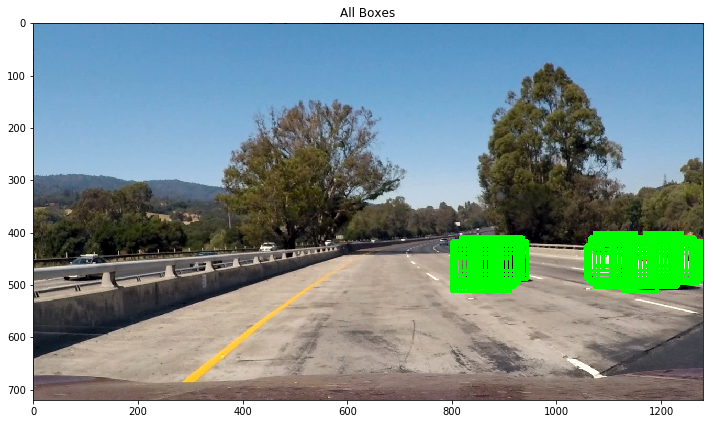

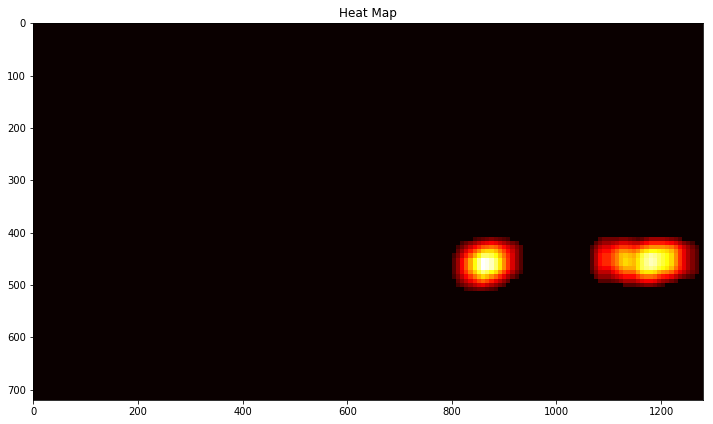

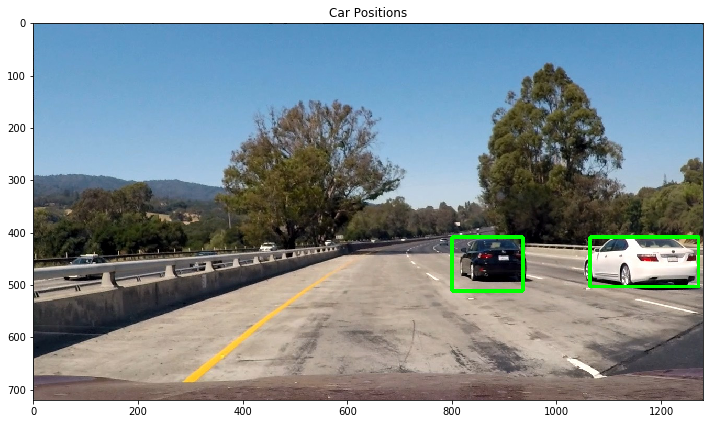

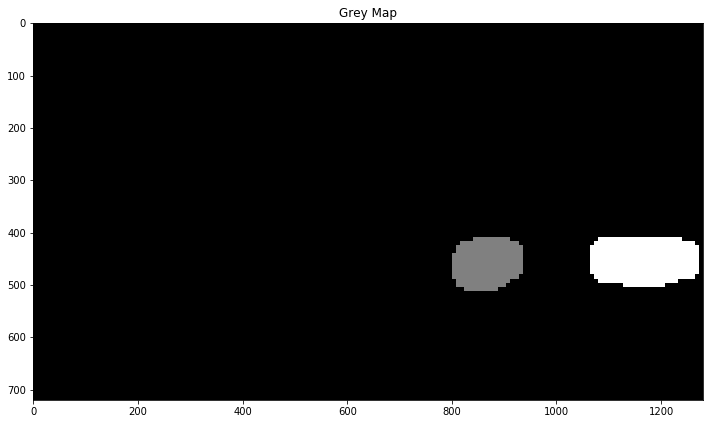

In [7]:
pipeline = DetectionPipeline(detection_model, lane_detector)
final_img = pipeline.combined_pipeline(test_image, is_video=False)

# Show the image with the windows on top
fig = plt.figure(figsize=(12,20))
plt.title('All Boxes')
plt.imshow(pipeline.all_boxes)

# Show the car positions and the heat map with threshold applied
fig = plt.figure(figsize=(12,20))
plt.imshow(pipeline.heatmap, cmap='hot')
plt.title('Heat Map')

fig = plt.figure(figsize=(12,20))
plt.imshow(final_img)
plt.title('Car Positions')

# Print information about the cars found
print(pipeline.labels[1], 'cars found')
fig = plt.figure(figsize=(12,20))
plt.title('Grey Map')
plt.imshow(pipeline.labels[0], cmap='gray')

In [8]:
pipeline.find_cars_in_video(video_path="./project_video.mp4")

[MoviePy] >>>> Building video project_video_result.mp4
[MoviePy] Writing video project_video_result.mp4


100%|█████████▉| 1260/1261 [01:09<00:00, 17.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_result.mp4 

